In \[1\]:

    #Import Libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

    sns.set_style("whitegrid")
    plt.style.use("fivethirtyeight")

In \[3\]:

    #Check out the Data
    USAhousing = pd.read_csv('USA_Housing.csv')
    USAhousing.head()

Out\[3\]:

|     | Avg. Area Income | Avg. Area House Age | Avg. Area Number of Rooms | Avg. Area Number of Bedrooms | Area Population | Price        | Address                                            |
|-----|------------------|---------------------|---------------------------|------------------------------|-----------------|--------------|----------------------------------------------------|
| 0   | 79545.458574     | 5.682861            | 7.009188                  | 4.09                         | 23086.800503    | 1.059034e+06 | 208 Michael Ferry Apt. 674\\nLaurabury, NE 3701... |
| 1   | 79248.642455     | 6.002900            | 6.730821                  | 3.09                         | 40173.072174    | 1.505891e+06 | 188 Johnson Views Suite 079\\nLake Kathleen, CA... |
| 2   | 61287.067179     | 5.865890            | 8.512727                  | 5.13                         | 36882.159400    | 1.058988e+06 | 9127 Elizabeth Stravenue\\nDanieltown, WI 06482... |
| 3   | 63345.240046     | 7.188236            | 5.586729                  | 3.26                         | 34310.242831    | 1.260617e+06 | USS Barnett\\nFPO AP 44820                         |
| 4   | 59982.197226     | 5.040555            | 7.839388                  | 4.23                         | 26354.109472    | 6.309435e+05 | USNS Raymond\\nFPO AE 09386                        |

In \[4\]:

    USAhousing.describe()

Out\[4\]:

|       | Avg. Area Income | Avg. Area House Age | Avg. Area Number of Rooms | Avg. Area Number of Bedrooms | Area Population | Price        |
|-------|------------------|---------------------|---------------------------|------------------------------|-----------------|--------------|
| count | 5000.000000      | 5000.000000         | 5000.000000               | 5000.000000                  | 5000.000000     | 5.000000e+03 |
| mean  | 68583.108984     | 5.977222            | 6.987792                  | 3.981330                     | 36163.516039    | 1.232073e+06 |
| std   | 10657.991214     | 0.991456            | 1.005833                  | 1.234137                     | 9925.650114     | 3.531176e+05 |
| min   | 17796.631190     | 2.644304            | 3.236194                  | 2.000000                     | 172.610686      | 1.593866e+04 |
| 25%   | 61480.562388     | 5.322283            | 6.299250                  | 3.140000                     | 29403.928702    | 9.975771e+05 |
| 50%   | 68804.286404     | 5.970429            | 7.002902                  | 4.050000                     | 36199.406689    | 1.232669e+06 |
| 75%   | 75783.338666     | 6.650808            | 7.665871                  | 4.490000                     | 42861.290769    | 1.471210e+06 |
| max   | 107701.748378    | 9.519088            | 10.759588                 | 6.500000                     | 69621.713378    | 2.469066e+06 |

In \[5\]:

    USAhousing.columns

Out\[5\]:

    Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
          dtype='object')

In \[6\]:

    #Exploratory Data Analysis (EDA)
    #Let's create some simple plots to check out the data!

    sns.pairplot(USAhousing)

Out\[6\]:

    <seaborn.axisgrid.PairGrid at 0x11bcab06130>

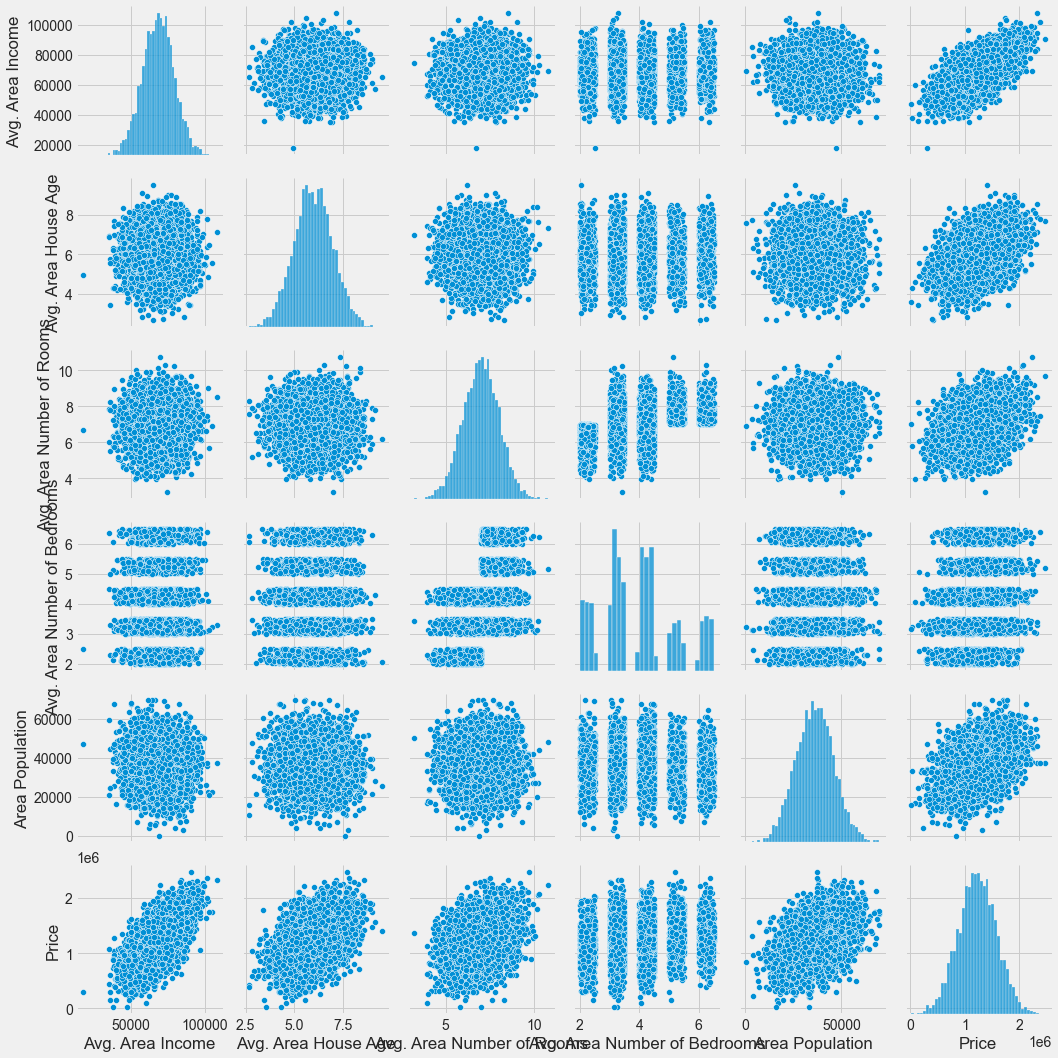

In \[7\]:

    sns.distplot(USAhousing['Price'])

    C:\jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

Out\[7\]:

    <AxesSubplot:xlabel='Price', ylabel='Density'>

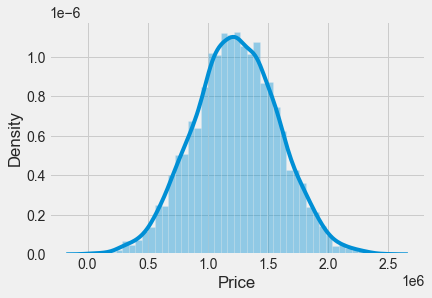

In \[8\]:

    sns.heatmap(USAhousing.corr(), annot=True)

Out\[8\]:

    <AxesSubplot:>

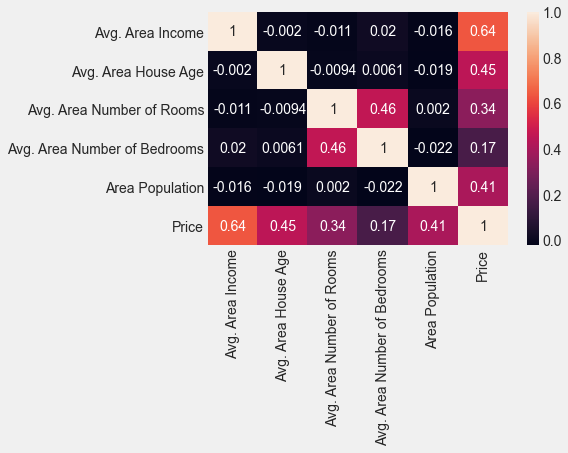

In \[9\]:

    #train regression model
    #X and y arrays
    X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                   'Avg. Area Number of Bedrooms', 'Area Population']]
    y = USAhousing['Price']

In \[10\]:

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In \[11\]:

    from sklearn import metrics
    from sklearn.model_selection import cross_val_score

    def cross_val(model):
        pred = cross_val_score(model, X, y, cv=10)
        return pred.mean()

    def print_evaluate(true, predicted):  
        mae = metrics.mean_absolute_error(true, predicted)
        mse = metrics.mean_squared_error(true, predicted)
        rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
        r2_square = metrics.r2_score(true, predicted)
        print('MAE:', mae)
        print('MSE:', mse)
        print('RMSE:', rmse)
        print('R2 Square', r2_square)
        
    def evaluate(true, predicted):
        mae = metrics.mean_absolute_error(true, predicted)
        mse = metrics.mean_squared_error(true, predicted)
        rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
        r2_square = metrics.r2_score(true, predicted)
        return mae, mse, rmse, r2_square

In \[12\]:

    #preparing data for linear regression
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    pipeline = Pipeline([
        ('std_scalar', StandardScaler())
    ])

    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)

In \[13\]:

    # Linear Regression
    from sklearn.linear_model import LinearRegression

    lin_reg = LinearRegression(normalize=True)
    lin_reg.fit(X_train,y_train)

Out\[13\]:

    LinearRegression(normalize=True)

In \[14\]:

    #Model Evaluation
    #Let's evaluate the model by checking out it's coefficients and how we can interpret them.
    # print the intercept
    print(lin_reg.intercept_)

    1228219.1492415662

In \[15\]:

    coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
    coeff_df

Out\[15\]:

|                              | Coefficient   |
|------------------------------|---------------|
| Avg. Area Income             | 232679.724643 |
| Avg. Area House Age          | 163841.046593 |
| Avg. Area Number of Rooms    | 121110.555478 |
| Avg. Area Number of Bedrooms | 2892.815119   |
| Area Population              | 151252.342377 |

In \[17\]:

    #Predictions from our Model
    #Let's grab predictions off our test set and see how well it did!

    pred = lin_reg.predict(X_test)

In \[18\]:

    plt.scatter(y_test, pred)

Out\[18\]:

    <matplotlib.collections.PathCollection at 0x11bcdeeb8e0>

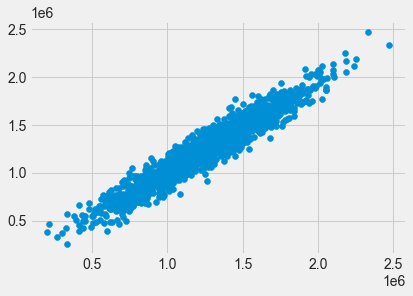

In \[19\]:

    #Residual Histogram

    sns.distplot((y_test - pred), bins=50);

    C:\jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
      warnings.warn(msg, FutureWarning)

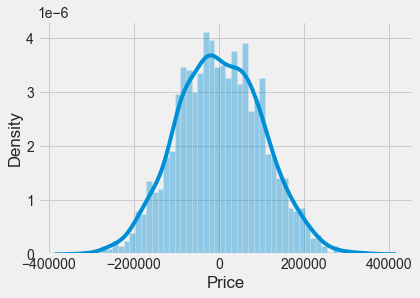

In \[20\]:

    #predicting
    test_pred = lin_reg.predict(X_test)
    train_pred = lin_reg.predict(X_train)

    print('Test set evaluation:\n_____________________________________')
    print_evaluate(y_test, test_pred)
    print('====================================')
    print('Train set evaluation:\n_____________________________________')
    print_evaluate(y_train, train_pred)

    Test set evaluation:
    _____________________________________
    MAE: 81135.56609336878
    MSE: 10068422551.40088
    RMSE: 100341.52954485436
    R2 Square 0.9146818498754016
    ====================================
    Train set evaluation:
    _____________________________________
    MAE: 81480.4997317489
    MSE: 10287043161.197224
    RMSE: 101425.06180031257
    R2 Square 0.9192986579075526

In \[21\]:

    results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                              columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
    results_df

Out\[21\]:

|     | Model             | MAE          | MSE          | RMSE          | R2 Square | Cross Validation |
|-----|-------------------|--------------|--------------|---------------|-----------|------------------|
| 0   | Linear Regression | 81135.566093 | 1.006842e+10 | 100341.529545 | 0.914682  | 0.917379         |

In \[ \]: